## Delhi-NCR  vs  Rest of India

1) number of restaurants present in Delhi NCR vs Rest of India.

Number of Restaurants in "Delhi-NCR": 7947
Number of Restaurants in "Rest of India": 705


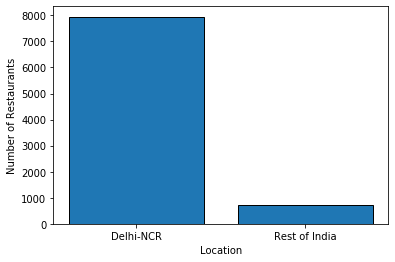

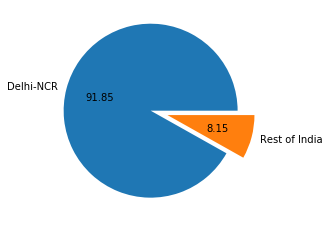

Percentage of Restaurants in "Delhi-NCR": 91.85%
Percentage of Restaurants in "Rest of India": 8.15


In [63]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
d=pd.read_csv('zomato.csv',encoding='latin-1')
df=d.copy()
df['City'].replace('New Delhi','Delhi-NCR',inplace=True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['City'].replace('Faridabad','Delhi-NCR',inplace=True)
df['City'].replace('Noida','Delhi-NCR',inplace=True)
dn=0   # Delhi-NCR restaurants
roi=0  # Rest of india restaurants

a=df['City'][df['Country Code']==1]
for i in a:
    if i=='Delhi-NCR':
        dn=dn+1
    else:
        roi=roi+1
print('Number of Restaurants in "Delhi-NCR":',dn)
print('Number of Restaurants in "Rest of India":',roi)
value=[]
bar=['Delhi-NCR','Rest of India']
value.append(dn)
value.append(roi)
plt.bar(bar,value,width=0.8,edgecolor='Black')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.show()
plt.pie(value,labels=bar,explode=[0.2,0.0],autopct='%.2f')
plt.show()
print('Percentage of Restaurants in "Delhi-NCR": 91.85%')
print('Percentage of Restaurants in "Rest of India": 8.15')

In [75]:
import requests
Api_key='dbd3500425c018125fbcc5d11821f095'
basic_api='https://developers.zomato.com/api/v2.1'
r=requests.get(basic_api+'/cuisines',headers={'user-key':Api_key},params={'city_id':1})
r=r.json()
r=r['cuisines']
C=[]  # cuisines in delhi ncr fetch from zomato Api
for i in r:
    C.append(i['cuisine']['cuisine_name'])
print(C)

['Afghan', 'African', 'American', 'Andhra', 'Arabian', 'Armenian', 'Asian', 'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Cuisine Varies', 'Desserts', 'Ethiopian', 'European', 'Fast Food', 'Finger Food', 'French', 'Frozen Yogurt', 'Goan', 'Greek', 'Grocery', 'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Malwani', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mishti', 'Mithai', 'Modern Indian', 'Momos', 'Moroccan', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Odia', 'Paan', 'Pakistani', 'Panini', 'Parsi', 'Pizza', 'Poké', 'Portuguese', 'Rajasthani', 'Raw Meats',

2 Cuisines not served in Delhi NCR

In [84]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
df['City'].replace('New Delhi','Delhi-NCR',inplace=True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['City'].replace('Faridabad','Delhi-NCR',inplace=True)
df['City'].replace('Noida','Delhi-NCR',inplace=True)
roi=df['Cuisines'][(df['Country Code']==1) & (df['City']!='Delhi-NCR')]
aroi=[]
for i in roi:
    a=i.split(',')
    for i in a:
        aroi.append(i.strip())
        
adn=[]
dn=df['Cuisines'][df['City']=='Delhi-NCR']
for i in dn:
    a=i.split(',')
    for i in a:
        adn.append(i.strip())
adn=set(adn)
adn=np.array(adn)  #cuisines in delhi ncr
#print(adn)
aroi=set(aroi)
aroi=np.array(aroi)  # cuisines in rest of india
#print(aroi)
cnidncr=aroi-adn    #Cuisines not in delhi ncr
print(cnidncr)



Api_key='dbd3500425c018125fbcc5d11821f095'
basic_api='https://developers.zomato.com/api/v2.1'
r=requests.get(basic_api+'/cuisines',headers={'user-key':Api_key},params={'city_id':1})
r=r.json()
r=r['cuisines']
C=[]  # cuisines in delhi ncr fetch from zomato Api
for i in r:
    C.append(i['cuisine']['cuisine_name'])


for i in cnidncr:
    if i in C:
        print(i,' Cuisine is Served in Delhi-NCR but not present in Dataset')
        print()
    else:
        print(i,'Cuisine is not served in Delhi-NCR')
        print()

{'Malwani', 'BBQ', 'Cajun', 'German'}
Malwani  Cuisine is Served in Delhi-NCR but not present in Dataset

BBQ  Cuisine is Served in Delhi-NCR but not present in Dataset

Cajun Cuisine is not served in Delhi-NCR

German Cuisine is not served in Delhi-NCR



3 Top 10 cuisines served by max number of restaurants in "Delhi-NCR" and 'Rest of India'

Top 10 Cuisines served by maximium number of restaurants in "Delhi-NCR":

1 North Indian
2 Chinese
3 Fast Food
4 Mughlai
5 Bakery
6 South Indian
7 Continental
8 Desserts
9 Street Food
10 Italian


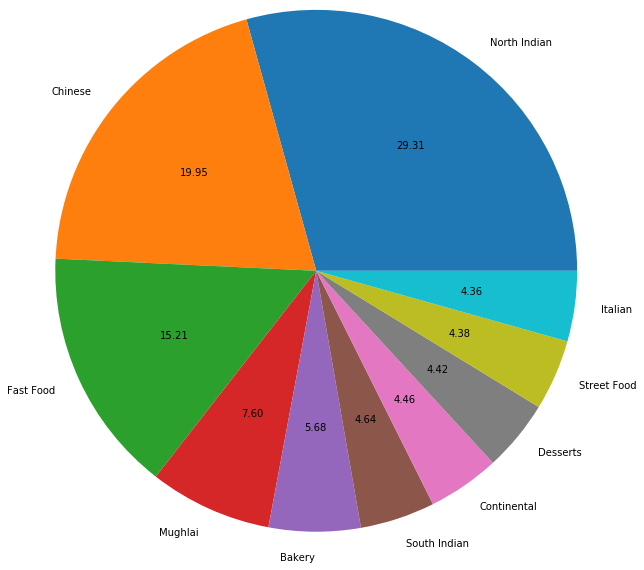

Top 10 Cuisines served by maximium number of restaurants in "Rest of India":

1 North Indian
2 Chinese
3 Continental
4 Italian
5 Cafe
6 Fast Food
7 South Indian
8 Mughlai
9 Desserts
10 Mexican


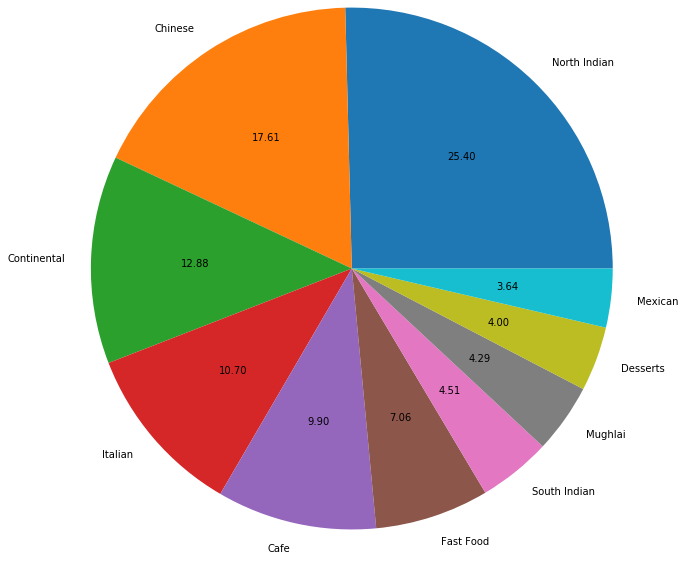

In [140]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
###################### replacing city names
df['City'].replace('New Delhi','Delhi-NCR',inplace=True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['City'].replace('Faridabad','Delhi-NCR',inplace=True)
df['City'].replace('Noida','Delhi-NCR',inplace=True)

##########
roi=df['Cuisines'][(df['Country Code']==1) & (df['City']!='Delhi-NCR')]
aroi=[]
for i in roi:
    a=i.split(',')
    for i in a:
        aroi.append(i.strip())

        
adn=[]
dn=df['Cuisines'][df['City']=='Delhi-NCR']
for i in dn:
    a=i.split(',')
    for i in a:
        adn.append(i.strip())
##########
dict_Dncr={}

for i in adn:
    if i in dict_Dncr:
        dict_Dncr[i]+=1
    else:
        dict_Dncr[i]=1
        
dict_Roi={}

for i in aroi:
    if i in dict_Roi:
        dict_Roi[i]+=1
    else:
        dict_Roi[i]=1
###### For Delhi NCR
mname=[]
mvalue=[]
for i in dict_Dncr:
    mname.append(i)
    mvalue.append(dict_Dncr[i])
mname=np.array(mname)
mvalue=np.array(mvalue)
mname=mname[np.argsort(mvalue)[::-1]][:10]
mvalue=np.sort(mvalue)[::-1][:10]
print('Top 10 Cuisines served by maximium number of restaurants in "Delhi-NCR":')
print()
for i in range(len(mname)):
    print(i+1,mname[i])
plt.pie(mvalue,labels=mname,radius=3,autopct="%.2f")
plt.show()

############ For Rest of India

mnames=[]
mvalues=[]
for i in dict_Roi:
    mnames.append(i)
    mvalues.append(dict_Roi[i])
mnames=np.array(mnames)
mvalues=np.array(mvalues)
mnames=mnames[np.argsort(mvalues)[::-1]][:10]
mvalues=np.sort(mvalues)[::-1][:10]
print('Top 10 Cuisines served by maximium number of restaurants in "Rest of India":')
print()
for i in range(len(mnames)):
    print(i+1,mnames[i])
plt.pie(mvalues,labels=mnames,radius=3,autopct="%.2f")
plt.show()

4) Difference in cuisines in Delhi-NCR and Rest of India

Top 10 Cuisines served by maximium number of restaurants in "Delhi-NCR" and "Rest of India":




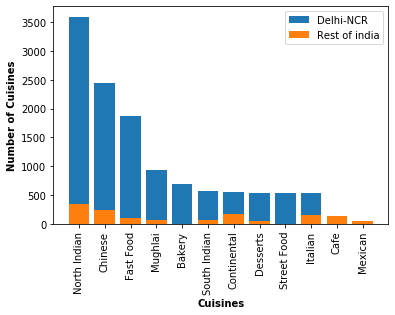

In [6]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
###################### replacing city names
df['City'].replace('New Delhi','Delhi-NCR',inplace=True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['City'].replace('Faridabad','Delhi-NCR',inplace=True)
df['City'].replace('Noida','Delhi-NCR',inplace=True)

##########
roi=df['Cuisines'][(df['Country Code']==1) & (df['City']!='Delhi-NCR')]
aroi=[]
for i in roi:
    a=i.split(',')
    for i in a:
        aroi.append(i.strip())

        
adn=[]
dn=df['Cuisines'][df['City']=='Delhi-NCR']
for i in dn:
    a=i.split(',')
    for i in a:
        adn.append(i.strip())
##########
dict_Dncr={}

for i in adn:
    if i in dict_Dncr:
        dict_Dncr[i]+=1
    else:
        dict_Dncr[i]=1
        
dict_Roi={}

for i in aroi:
    if i in dict_Roi:
        dict_Roi[i]+=1
    else:
        dict_Roi[i]=1
###### For Delhi NCR
mname=[]
mvalue=[]
for i in dict_Dncr:
    mname.append(i)
    mvalue.append(dict_Dncr[i])
mname=np.array(mname)
mvalue=np.array(mvalue)
mname=mname[np.argsort(mvalue)[::-1]][:10]
mvalue=np.sort(mvalue)[::-1][:10]
print('Top 10 Cuisines served by maximium number of restaurants in "Delhi-NCR" and "Rest of India":')
print()

plt.bar(mname,mvalue,label='Delhi-NCR')


############ For Rest of India

mnames=[]
mvalues=[]
for i in dict_Roi:
    mnames.append(i)
    mvalues.append(dict_Roi[i])
mnames=np.array(mnames)
mvalues=np.array(mvalues)
mnames=mnames[np.argsort(mvalues)[::-1]][:10]
mvalues=np.sort(mvalues)[::-1][:10]

print()

plt.bar(mnames,mvalues,label="Rest of india")
plt.xticks(rotation=90)
plt.ylabel('Number of Cuisines',fontweight='bold')
plt.xlabel('Cuisines',fontweight='bold')
plt.legend()  # to show keywords

plt.show()


## Affects of  User Rating

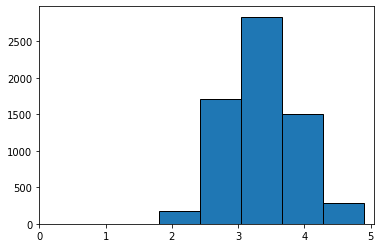

In [3]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
rating=df['Aggregate rating'][(df['Country Code']==1) & (df['Rating text']!='Not rated')]
votes=df['Votes'][(df['Country Code']==1)& (df['Rating text']!='Not rated')]
plt.hist(rating,bins=5,edgecolor='black')
plt.xticks(np.arange(0,6,1))
plt.xlabel('Rating')
plt.ylabel('number of Votes')
plt.show()

### Visualizations

1)  top 15 restaurants have a maximum number of outlets.

['Cafe Coffee Day' "Domino's Pizza" 'Subway' 'Green Chick Chop'
 "McDonald's" 'Keventers' 'Pizza Hut' 'Giani' 'Baskin Robbins'
 'Barbeque Nation']
[83 79 63 51 48 34 29 29 28 25]


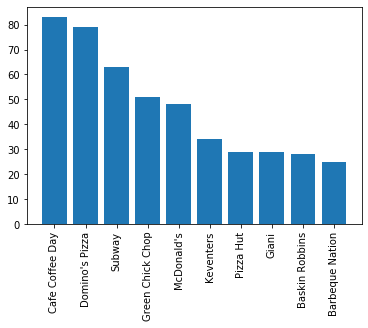

In [3]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
restname=df['Restaurant Name'][df['Country Code']==1]
dict={}
for i in restname:
    if i in dict:
        dict[i]+=1
    else:
        dict[i]=1
name=[]
number=[]
for i in dict:
    name.append(i)
    number.append(dict[i])
name=np.array(name)
number=np.array(number)
name=name[np.argsort(number)][::-1][:10]
print(name)
number=np.sort(number)[::-1][:10]
print(number)
plt.bar(name,number)
plt.xticks(rotation=90)
plt.show()

2) histogram of aggregate rating of restaurant( drop the unrated restaurant).

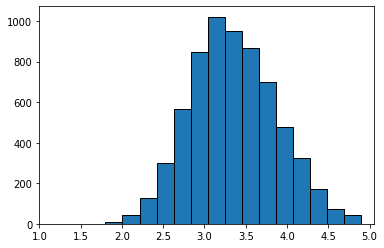

Highest rating 4.9
Minimium rating 1.8


In [47]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
rating=df['Aggregate rating'][(df['Country Code']==1) & (df['Aggregate rating']!=0)]
plt.hist(rating,bins=15,edgecolor='black')
plt.xticks(np.arange(1,5.1,0.5))
plt.show()
print("Highest rating",max(rating))
print('Minimium rating',min(rating))

 3) top 10 restaurants in the data with the highest number of votes.

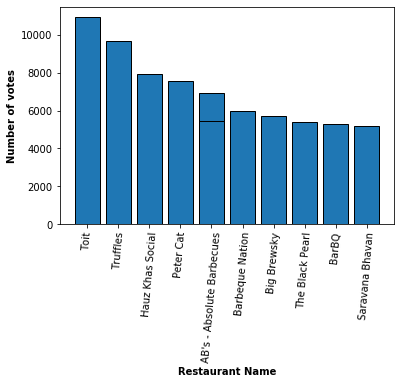

In [12]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
restname=df['Restaurant Name'][df['Country Code']==1]
votes=df['Votes'][df['Country Code']==1]
restname=np.array(restname)
votes=np.array(votes)
restname=restname[np.argsort(votes)][::-1][:11]
votes=np.sort(votes)[::-1][:11]
plt.bar(restname,votes,edgecolor='Black')
plt.xlabel('Restaurant Name',fontweight='bold')
plt.ylabel('Number of votes',fontweight='bold')
plt.xticks(rotation=85)
plt.show()


the pie graph of top 10 cuisines present in restaurants in the USA.

['American' 'Seafood' 'Pizza' 'Burger' 'Sandwich' 'Steak' 'Italian'
 'Breakfast' 'Mexican' 'Sushi']
[112  59  49  49  49  42  38  37  36  34]


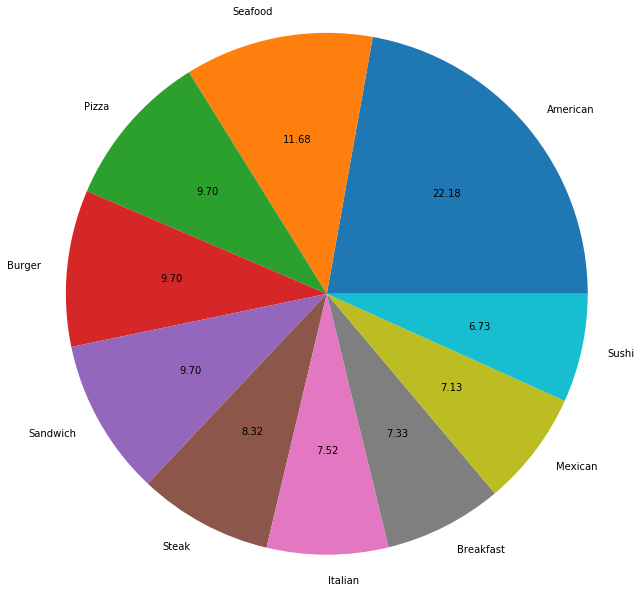

In [27]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
cuisines=df['Cuisines'][(df['Country Code']==216) & (df['Cuisines'].notna())]
cui=[]
for i in cuisines:
    a=i.split(',')
    for j in a:
        cui.append(j.strip())
dict={}
for i in cui:
    if i in dict:
        dict[i]+=1
    else:
        dict[i]=1
name=[]
value=[]
for i in dict:
    name.append(i)
    value.append(dict[i])
name=np.array(name)
value=np.array(value)
name=name[np.argsort(value)][::-1][:10]
print(name)
value=np.sort(value)[::-1][:10]
print(value)
plt.pie(value,labels=name,radius=3,autopct="%.2f")
plt.show()

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [76]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
city=df['City'][(df['Country Code']==1)]
city=set(city)
citi=[]
wei=[]
for i in city:
    rating=df['Aggregate rating'][(df['Country Code']==1) & (df['City']==i)]
    votes=df['Votes'][(df['Country Code']==1)& (df['City']==i)]
    rating=np.array(rating)
    votes=np.array(votes)
    sumvotes=0
    for j in votes:
        sumvotes+=j

    multiply_votes_rating=rating*votes

    sumvote_rat=0
    for k in multiply_votes_rating:
        sumvote_rat+=k

    weight=sumvote_rat/sumvotes
    weight=round(weight,2)
    wei.append(weight)
    citi.append(i)

 The weighted restaurant rating of each locality and top 10 locality with more weighted rating

In [9]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
Locality=df['Locality'][(df['Country Code']==1)& (df['Rating text']!='Not rated')]
Locality=set(Locality)
loc=[]
wei=[]
for i in Locality:
    rating=df['Aggregate rating'][(df['Country Code']==1) & (df['Locality']==i)& (df['Votes']!=0) & (df['Rating text']!='Not rated') ]
    votes=df['Votes'][(df['Country Code']==1)& (df['Locality']==i)& (df['Votes']!=0)& (df['Rating text']!='Not rated')]
    rating=np.array(rating)
    votes=np.array(votes)
   
    sumvotes=0
    for j in votes:
        sumvotes+=j
    
    multiply_votes_rating=rating*votes

    sumvote_rat=0
    for k in multiply_votes_rating:
        sumvote_rat+=k

    weight=sumvote_rat/sumvotes
    weight=round(weight,2)
    loc.append(i)
    wei.append(weight)
loc=np.array(loc)
wei=np.array(wei)
loc=loc[np.argsort(wei)][::-1][:10]

wei=np.sort(wei)[::-1][:10]
print('Top 10 weighted restaurant')
print("RESTAURANT LOCALITY   \t                |  WEIGHTED RATING")
print()
for i in range(10):
      print('{:<40s}|{:>11f}'.format(loc[i],wei[i]))

Top 10 weighted restaurant
RESTAURANT LOCALITY   	                |  WEIGHTED RATING

Hotel Clarks Amer, Malviya Nagar        |   4.900000
Aminabad                                |   4.900000
Friends Colony                          |   4.890000
Powai                                   |   4.840000
Kirlampudi Layout                       |   4.820000
Deccan Gymkhana                         |   4.800000
Express Avenue Mall,  Royapettah        |   4.800000
Banjara Hills                           |   4.720000
Sector 5, Salt Lake                     |   4.710000
Riverside Mall, Gomti Nagar             |   4.700000


Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

    Number of Votes given Restaurant

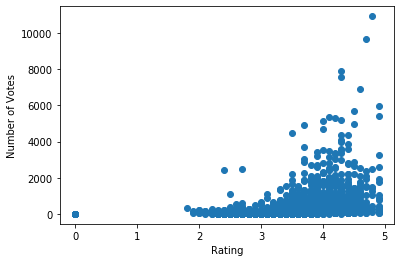

In [5]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
votes=df['Votes'][df['Country Code']==1]
votes=np.array(votes)
rating=df['Aggregate rating'][df['Country Code']==1]
rating=np.array(rating)
plt.scatter(rating,votes)
plt.ylabel('Number of Votes')
plt.xlabel('Rating')
plt.show()

Restaurant serving more number of cuisines.

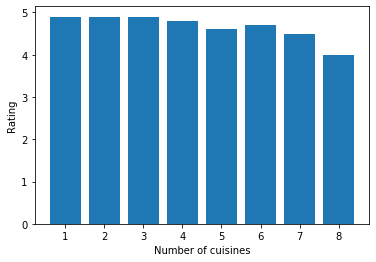

In [28]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
cuisines=df['Cuisines'][df['Country Code']==1]
cui=[]
for i in cuisines:
    a=i.split(',')
    cui.append(len(a))

rating=df['Aggregate rating'][df['Country Code']==1]
plt.bar(cui,rating)
plt.xlabel('Number of cuisines')
plt.ylabel('Rating')
plt.show()

In [ ]:
Average Cost of Restaurant

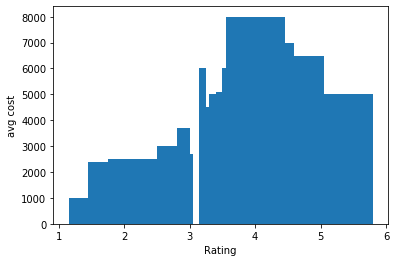

In [35]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
avgcost=df['Average Cost for two'][(df['Country Code']==1)& (df['Rating text']!='Not rated')]
rating=df['Aggregate rating'][(df['Country Code']==1)& (df['Rating text']!='Not rated')]
plt.bar(rating,avgcost)
plt.ylabel('avg cost')
plt.xlabel('Rating')
plt.show()

In [ ]:
Restaurant serving some specific cuisines

In [48]:
import csv
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
d=pd.read_csv('zomato.csv',encoding='latin-1')  # encoding for json files
df=d.copy()
cuisines=df['Cuisines'][df['Country Code']==1]
cui=[]
for i in cuisines:
    a=i.split(',')
    for i in a:
        cui.append(i)
print(df['Restaurant Name'][df['Cuisines']=='German'])
cui=set(cui)
for i in cui:
    rating=df['Aggregate rating'][(df['Country Code']==1)]
    votes=df['Votes'][(df['Country Code']==1)]
    rating=np.array(rating)
    votes=np.array(votes)
    sumvotes=0
    print(i)
    for j in votes:
        sumvotes+=j

    multiply_votes_rating=rating*votes

    sumvote_rat=0
    for k in multiply_votes_rating:
        sumvote_rat+=k

    weight=sumvote_rat/sumvotes
    weight=round(weight,2)
    wei.append(weight)
    cui.append(i)
    

138                     Augsburg Haus
310                          Bodensee
361    Hollerbach's Willow Tree Cafí©
Name: Restaurant Name, dtype: object
 German


ZeroDivisionError: division by zero